**Set up notebook:**

In [1]:
#Configure Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Path to dataset folder
data_folder = '/content/drive/My Drive/MA/'

Mounted at /content/drive


In [2]:
#Import required libraries for this notebook
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns

**Load dataset:**

In [3]:
#Read WTG data
signals = 'wind-farm-1-signals-training.csv'
signals_test = 'wind-farm-1-signals-testing.csv'
all_data = pd.concat([pd.read_csv(data_folder + signals, delimiter=';'), pd.read_csv(data_folder + signals_test, delimiter=';')], ignore_index=True)
all_data['Timestamp'] = pd.to_datetime(all_data['Timestamp'])
all_data.set_index('Timestamp', inplace=True)

#Filter T_09 data out
wtg_data = all_data[all_data.Turbine_ID == 'T09']

#wtg_data = wtg_data[wtg_data['Grd_Prod_Pwr_Avg'] > 0]
print(wtg_data.dtypes)
wtg_data.head()

Turbine_ID                object
Gen_RPM_Max              float64
Gen_RPM_Min              float64
Gen_RPM_Avg              float64
Gen_RPM_Std              float64
                          ...   
Grd_Prod_PsbleCap_Max    float64
Grd_Prod_PsbleCap_Min    float64
Grd_Prod_PsbleCap_Std    float64
Gen_Bear2_Temp_Avg         int64
Nac_Direction_Avg        float64
Length: 82, dtype: object


,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,T09,1376.7,1234.3,1272.0,24.7,40.0,58,57,58,44,...,-861.6,-224.5,-1000.0,185.5,861.6,1000.0,224.5,185.5,33,214.0
2016-01-01 00:10:00+00:00,T09,1485.0,1239.7,1321.4,50.4,40.0,58,57,58,44,...,-871.4,-293.3,-1000.0,227.4,871.4,1000.0,293.3,227.4,33,214.0
2016-01-01 00:20:00+00:00,T09,1441.0,1274.6,1363.4,31.0,40.0,58,57,58,44,...,-999.7,-904.9,-1000.0,4.2,999.7,1000.0,904.9,4.2,33,214.0
2016-01-01 00:30:00+00:00,T09,1549.4,1266.5,1379.7,76.8,41.0,59,58,59,44,...,-1000.0,-1000.0,-1000.0,0.0,1000.0,1000.0,1000.0,0.0,33,214.0
2016-01-01 00:40:00+00:00,T09,1536.5,1337.1,1426.9,42.0,41.0,59,58,59,44,...,-998.9,-730.8,-1000.0,13.9,998.9,1000.0,730.8,13.9,34,214.0


In [4]:
wtg_data.tail()

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Avg,Grd_Prod_PsbleInd_Max,Grd_Prod_PsbleInd_Min,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-12-31 23:10:00+00:00,T09,1513.6,1241.0,1361.0,91.5,39.0,61,60,61,45,...,-991.8,-734.1,-1000.0,32.6,991.8,1000.0,734.1,32.6,32,319.9
2017-12-31 23:20:00+00:00,T09,1283.1,1233.6,1252.4,9.2,39.0,61,59,61,45,...,-941.4,-445.2,-1000.0,108.9,941.4,1000.0,445.2,108.9,32,321.3
2017-12-31 23:30:00+00:00,T09,1259.7,1239.3,1250.2,3.9,39.0,60,59,61,45,...,-846.3,-300.3,-1000.0,178.8,846.3,1000.0,300.3,178.8,32,329.5
2017-12-31 23:40:00+00:00,T09,1279.2,1241.8,1253.0,6.7,39.0,60,59,60,45,...,-999.6,-964.1,-1000.0,2.8,999.6,1000.0,964.1,2.8,32,329.6
2017-12-31 23:50:00+00:00,T09,1258.3,1239.7,1249.5,3.1,39.0,60,58,60,45,...,-955.8,-372.9,-1000.0,119.2,955.8,1000.0,372.9,119.2,32,339.7


In [5]:
#Read log data
logs = 'wind-farm-1-logs-training.csv'
logs_test = 'wind-farm-1-logs-testing.csv'
log_data = pd.concat([pd.read_csv(data_folder + logs, delimiter=';'), pd.read_csv(data_folder + logs_test, delimiter=';')], ignore_index=True)
log_data['TimeDetected'] = pd.to_datetime(log_data['TimeDetected'])
log_data.set_index('TimeDetected', inplace=True)
log_data = log_data[log_data['UnitTitle'] == 'T09']
log_data.head()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2016-01-01 00:11:33+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 00:41:33+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 01:11:32+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 01:41:32+00:00,NaN,T09,External power ref.:2000kW,NaN
2016-01-01 02:13:33+00:00,NaN,T09,"Gen. ext. vent. 1, temp: 49°C",NaN


In [6]:
log_data.tail()

,TimeReset,UnitTitle,Remark,UnitTitleDestination
TimeDetected,,,,
2017-12-31 23:16:55+00:00,NaN,T09,External power ref.:2000kW,NaN
2017-12-31 23:43:48+00:00,NaN,T09,E.Wind: 5.1m/s Nac.Dir: 340.4°,NaN
2017-12-31 23:43:48+00:00,NaN,T09,Wind: 4.9 m/s Gen:1248.1 RPM,NaN
2017-12-31 23:43:48+00:00,NaN,T09,Pitch: -1.3° Power: 191.0 kW,NaN
2017-12-31 23:46:55+00:00,NaN,T09,External power ref.:2000kW,NaN


In [7]:
#@title Following failures were reported for the turbine:


In [8]:
#@title Failure Group 1: GENERATOR_BEARING June 7, 2016 4:59 PM High temperature generator bearing; GENERATOR_BEARING October 17, 2016 9:19 AM Generator bearings replaced


In [ ]:
target = 'Gen_Bearing_Temp_Avg'

In [ ]:
#Logs containing "bearing 1": related to generator bearing 1 damage
logs_1 = log_data[log_data.Remark.str.contains('bearing 1', na=False, case=False)].rename(columns={'Remark' : 'Remark_1'})
logs_1

,TimeReset,UnitTitle,Remark_1,UnitTitleDestination
TimeDetected,,,,
2016-06-07 16:58:42+00:00,2016-06-07 18:54:32,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 14:45:57+00:00,2016-06-21 14:50:03,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 16:20:39+00:00,2016-06-21 16:33:22,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-21 17:58:34+00:00,2016-06-21 18:30:10,T09,High temp. Gen bearing 1: 99°C,NaN
2016-06-22 15:01:24+00:00,2016-06-22 17:09:16,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 15:57:13+00:00,2016-07-03 16:02:22,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 17:10:13+00:00,2016-07-03 17:51:51,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-03 20:21:40+00:00,2016-07-03 21:23:23,T09,High temp. Gen bearing 1: 99°C,NaN
2016-07-09 17:10:00+00:00,2016-07-09 20:23:36,T09,High temp. Gen bearing 1: 99°C,NaN


In [ ]:
#@title Failure 2: GEARBOX October 11, 2016 8:06 AM Gearbox repaired


In [ ]:
#NO RELEVANT LOGS FOUND
logs_2 = log_data[log_data.Remark.str.contains('high temp gear', na=False, case=False)].rename(columns={'Remark' : 'Remark_2'})
logs_2

,TimeReset,UnitTitle,Remark_2,UnitTitleDestination
TimeDetected,,,,


In [ ]:
#@title Failure 3: GENERATOR_BEARING January 25, 2017 12:55 PM Generator bearings replaced

In [ ]:
#NO RELEVANT LOGS FOUND
logs_3 = log_data[log_data.Remark.str.contains('bearing 2', na=False, case=False)].rename(columns={'Remark' : 'Remark_3'})
logs_3

,TimeReset,UnitTitle,Remark_3,UnitTitleDestination
TimeDetected,,,,


In [ ]:
#@title Failure 4: HYDRAULIC_GROUP September 16, 2017 3:46 PM Pitch position error related GH


In [ ]:
#Logs containing "pitch c": related to Pitch position error
logs_4 = log_data[log_data.Remark.str.contains('pitch c', na=False, case=False)].rename(columns={'Remark' : 'Remark_4'})
logs_4

,TimeReset,UnitTitle,Remark_4,UnitTitleDestination
TimeDetected,,,,
2016-12-29 09:17:26+00:00,2016-12-29 09:18:39,T09,"Pitch C ref:10.2°, Act.: 5.6°",NaN
2016-12-29 09:21:23+00:00,2016-12-29 09:23:36,T09,"Pitch C ref:77.0°, Act.:89.5°",NaN
2016-12-29 09:23:38+00:00,2016-12-29 09:28:53,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 09:24:44+00:00,2016-12-29 09:28:53,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 09:28:54+00:00,2016-12-29 09:48:57,T09,"Pitch C ref:79.7°, Act.:89.5°",NaN
2016-12-29 09:48:58+00:00,2016-12-29 10:50:10,T09,"Pitch C ref:79.8°, Act.:89.5°",NaN
2016-12-29 10:53:28+00:00,2016-12-29 11:56:08,T09,"Pitch C ref:52.4°, Act.:32.2°",NaN
2016-12-29 12:21:15+00:00,NaN,T09,"Pitch C ref:49.9°, Act.:89.5°",NaN
2016-12-29 12:49:10+00:00,2016-12-29 12:49:50,T09,"Pitch C ref: 5.3°, Act.:-0.3°",NaN


In [ ]:
#@title Failure 5: GEARBOX October 18, 2017 8:32 AM Gearbox noise


In [ ]:
#NO RELEVANT LOGS FOUND
logs_5 = log_data[log_data.Remark.str.contains('high temp gear', na=False, case=False)].rename(columns={'Remark' : 'Remark_5'})
logs_5

,TimeReset,UnitTitle,Remark_5,UnitTitleDestination
TimeDetected,,,,


In [ ]:
#Create a new column to label the signals: 'F1'/'F2'/'F3'/'F4'/'F5' : Log entry related to 1st/2nd/3rd/4th/5th Failure was found during the previous 10 min, 
#'Reported' : Failure reported by the technician at this time, 'None': nothing reported or logged
#Initialize to 'None'
wtg_data['Failure'] = 'None'

#Join with log data for Failure 1
wtg_data = pd.merge_asof(wtg_data, logs_1['Remark_1'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F1'
wtg_data.loc[wtg_data.Remark_1.str.contains('bearing 1', na=False, case=False), 'Failure'] = 'F1'

#Join with log data for Failure 4
wtg_data = pd.merge_asof(wtg_data, logs_4['Remark_4'], left_index = True, right_index = True, tolerance = pd.Timedelta('10m'))

#Label data points 'F4'
wtg_data.loc[wtg_data.Remark_4.str.contains('pitch c', na=False, case=False), 'Failure'] = 'F4'

#Label reported failures
wtg_data.loc['2016-06-07 17:00:00+00:00', 'Failure'] = 'Reported F1'
wtg_data.loc['2016-08-22 06:30:00+00:00', 'Failure'] = 'Reported F1'
wtg_data.loc['2016-10-11 08:10:00+00:00', 'Failure'] = 'Reported F2'
wtg_data.loc['2016-10-17 09:20:00+00:00', 'Failure'] = 'Reported F1'
wtg_data.loc['2017-01-25 13:00:00+00:00', 'Failure'] = 'Reported F3'
wtg_data.loc['2017-09-16 15:50:00+00:00', 'Failure'] = 'Reported F4'
wtg_data.loc['2017-10-18 08:40:00+00:00', 'Failure'] = 'Reported F5'

In [ ]:
#Validate
wtg_data['2016-06-07' : '2016-06-07'].dropna(subset=['Remark_1'])

,Turbine_ID,Gen_RPM_Max,Gen_RPM_Min,Gen_RPM_Avg,Gen_RPM_Std,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Hyd_Oil_Temp_Avg,...,Grd_Prod_PsbleInd_Std,Grd_Prod_PsbleCap_Avg,Grd_Prod_PsbleCap_Max,Grd_Prod_PsbleCap_Min,Grd_Prod_PsbleCap_Std,Gen_Bear2_Temp_Avg,Nac_Direction_Avg,Failure,Remark_1,Remark_4
Timestamp,,,,,,,,,,,,,,,,,,,,,
2016-06-07 17:00:00+00:00,T09,1755.4,164.3,1609.3,277.0,99.0,138,130,133,51,...,186.1,418.8,1000.0,0.0,167.6,79,92.7,Reported,High temp. Gen bearing 1: 99°C,NaN


In [ ]:
wtg_data = wtg_data[~wtg_data.index.duplicated()]
x='Timestamp'
c1= '#d3d3d3'
style = 'Failure'
hue = 'Failure'
s = 80

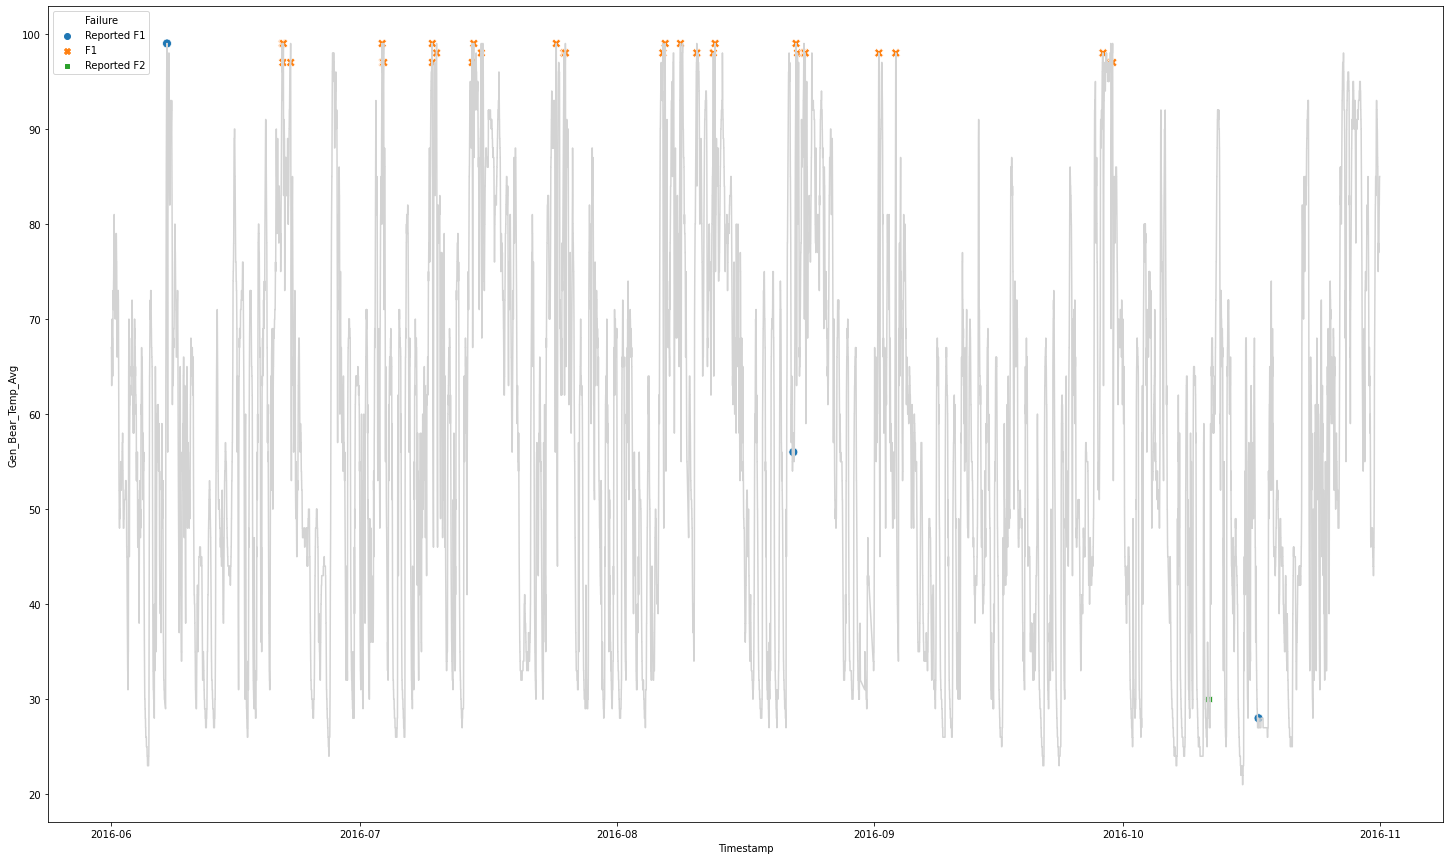

In [ ]:
#Visualize Failure 1
y = 'Gen_Bear_Temp_Avg'
data = wtg_data['2016-06-01' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

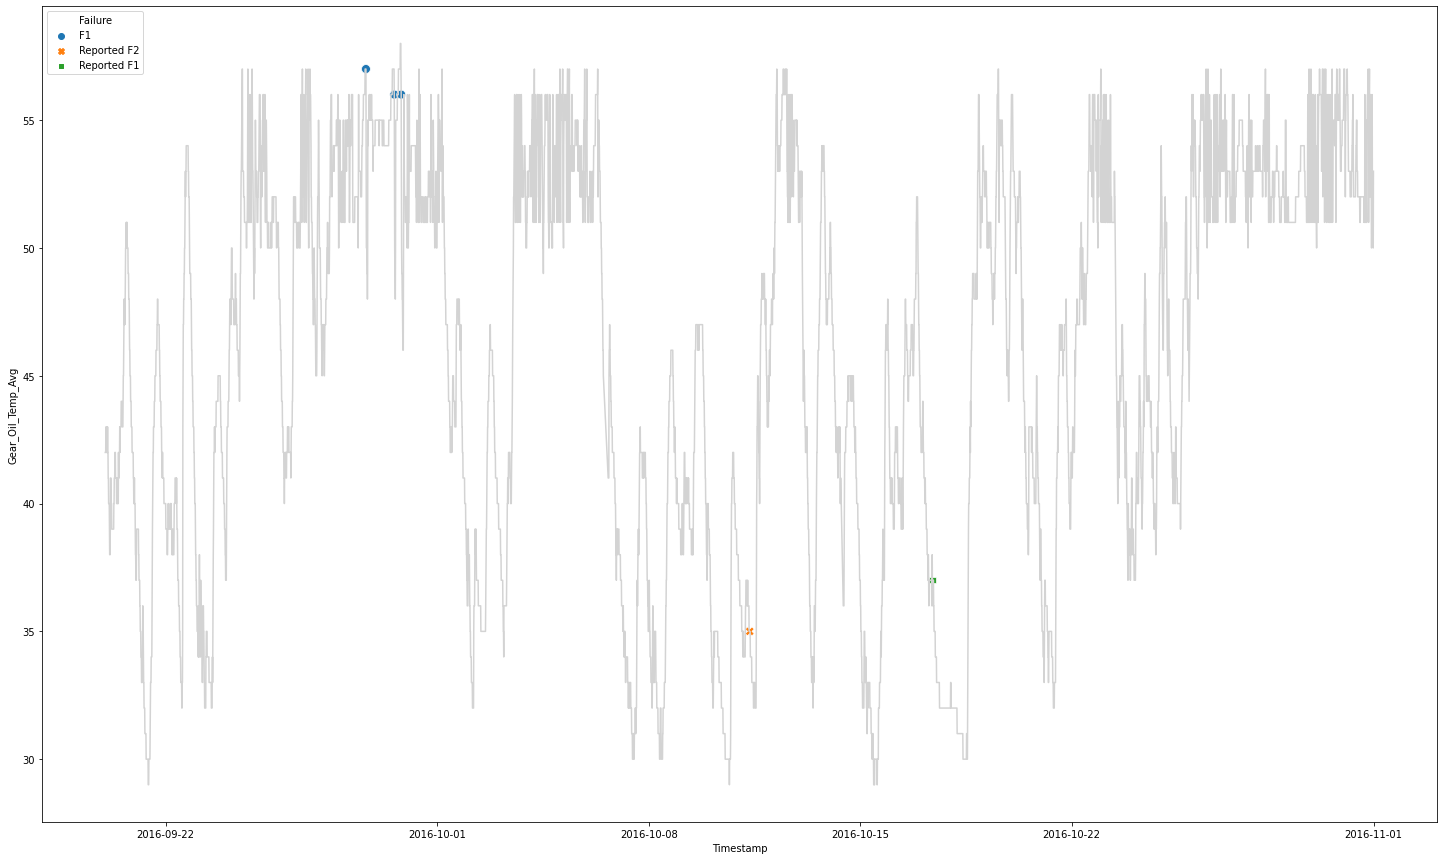

In [ ]:
#Visualize Failure 2
y = 'Gear_Oil_Temp_Avg'
data = wtg_data['2016-09-20' : '2016-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

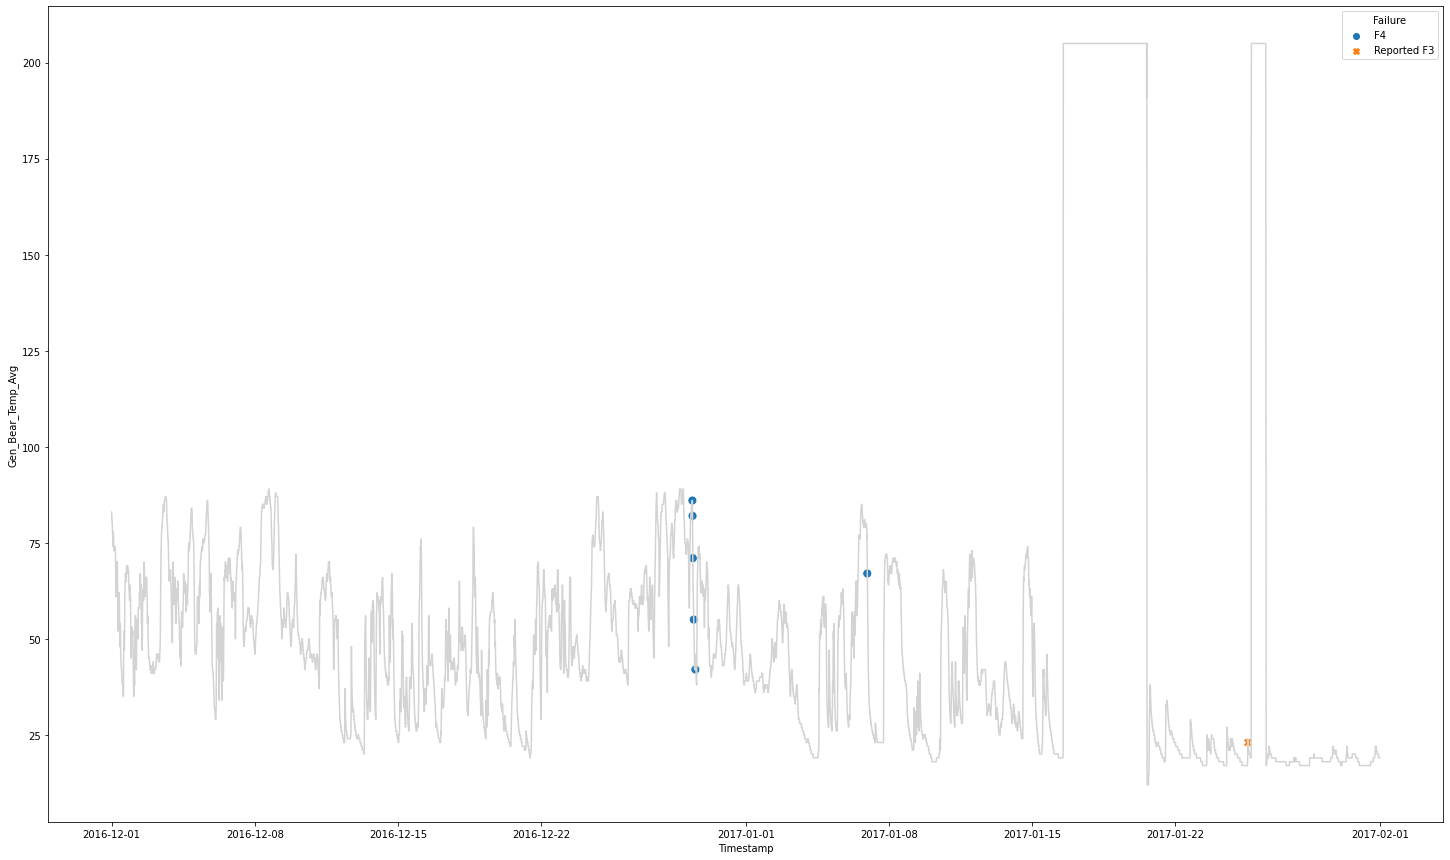

In [ ]:
#Visualize Failure 3 (Bearing 1)
y = 'Gen_Bear_Temp_Avg'
data = wtg_data['2016-12-01' : '2017-01-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

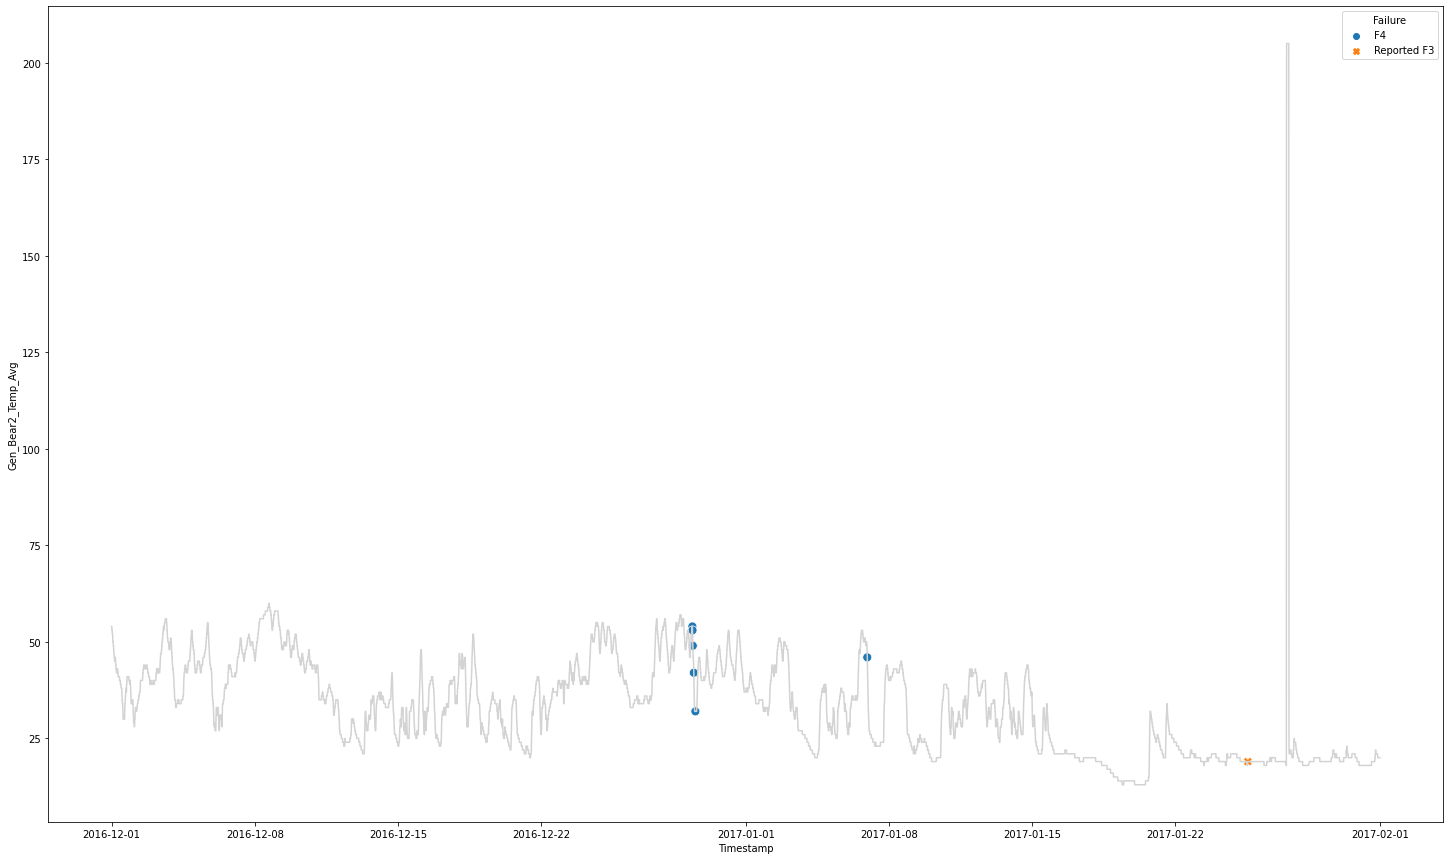

In [ ]:
#Visualize Failure 3 (Bearing 2)
y = 'Gen_Bear2_Temp_Avg'
data = wtg_data['2016-12-01' : '2017-01-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

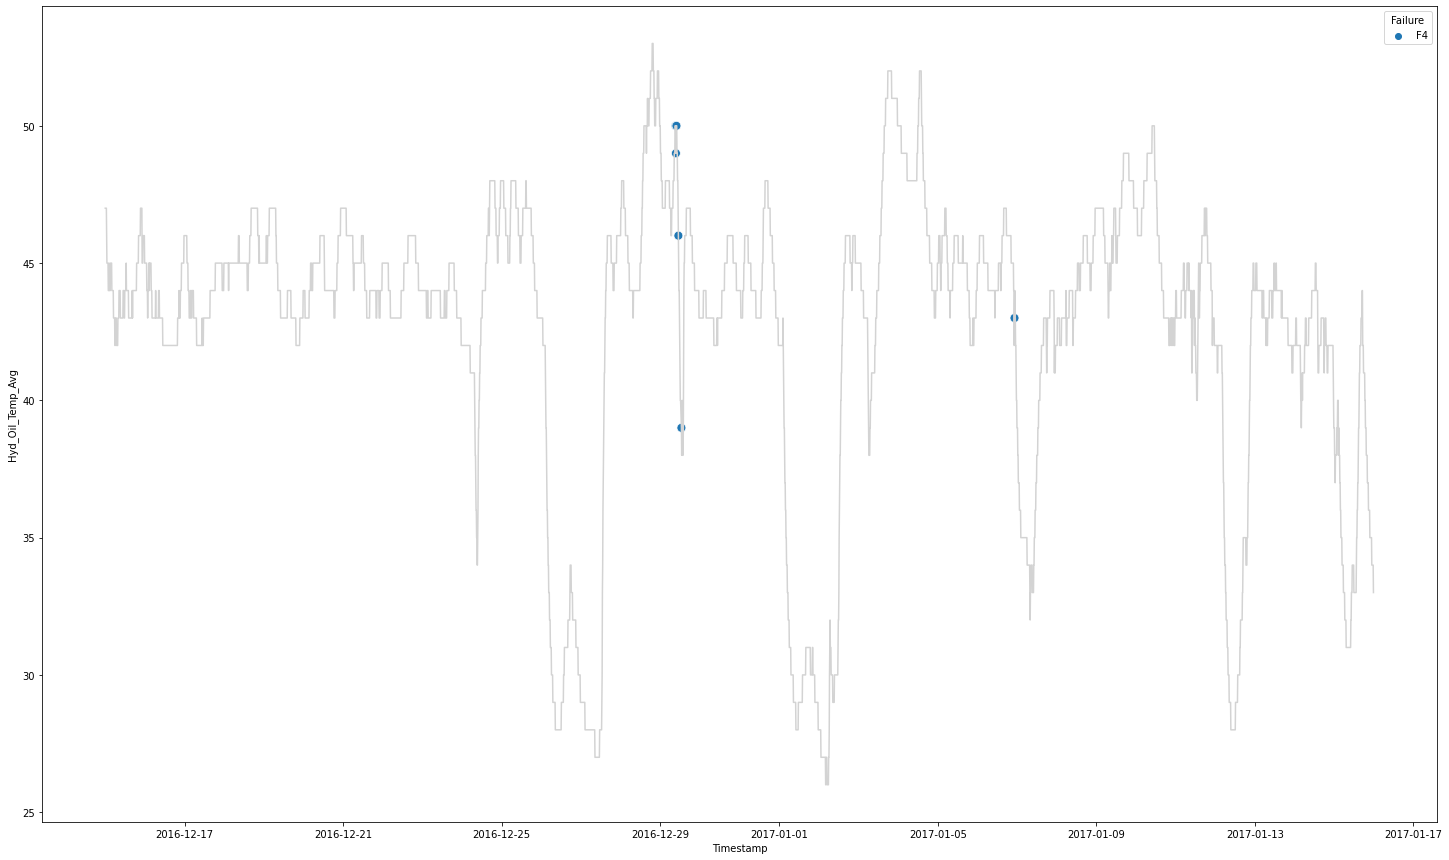

In [ ]:
#Visualize Failure 4 (1st part)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2016-12-15' : '2017-01-15']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

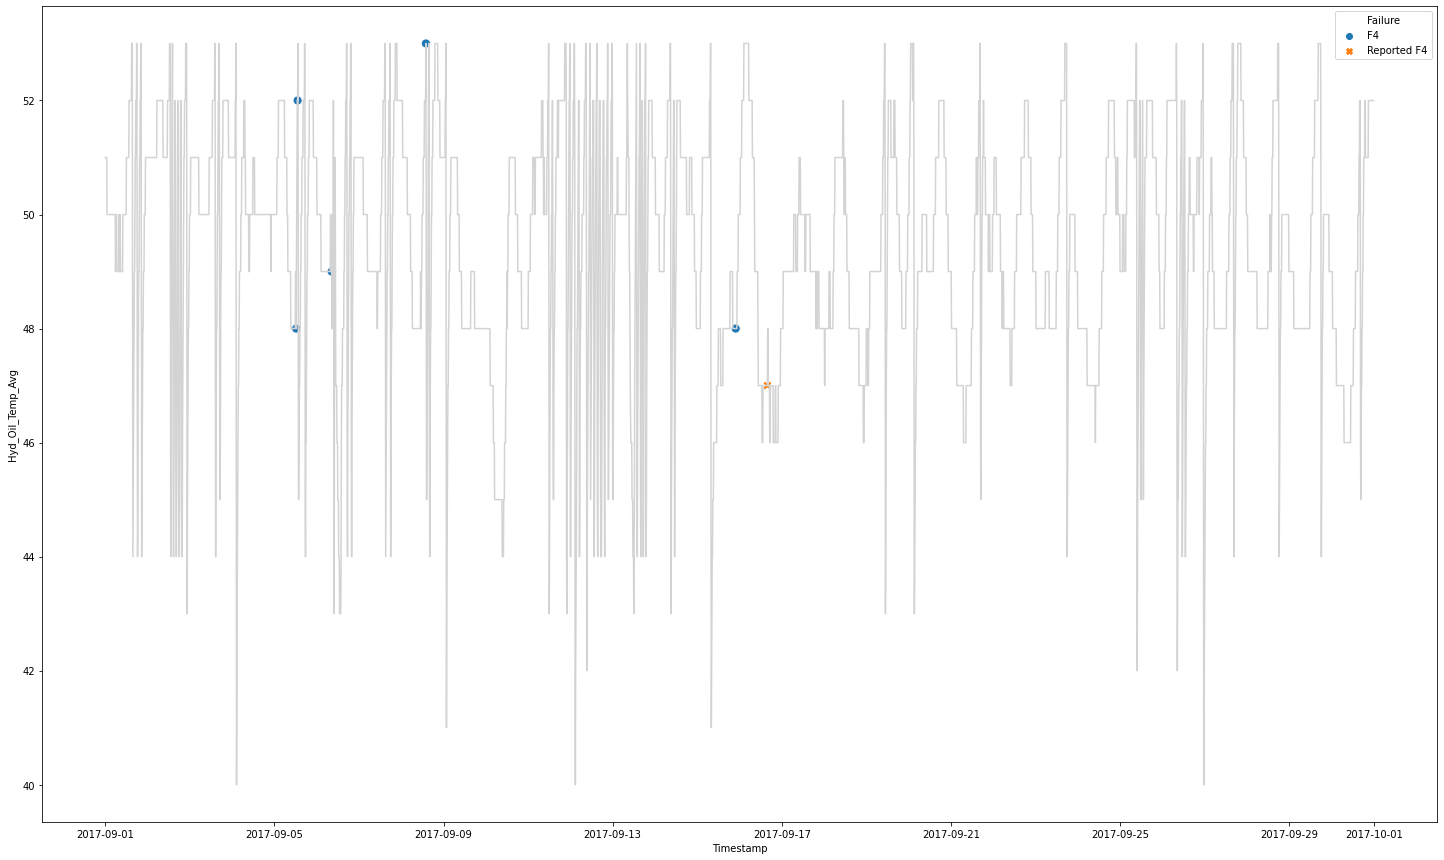

In [ ]:
#Visualize Failure 4 (2nd part)
y = 'Hyd_Oil_Temp_Avg'
data = wtg_data['2017-09-01' : '2017-09-30']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])

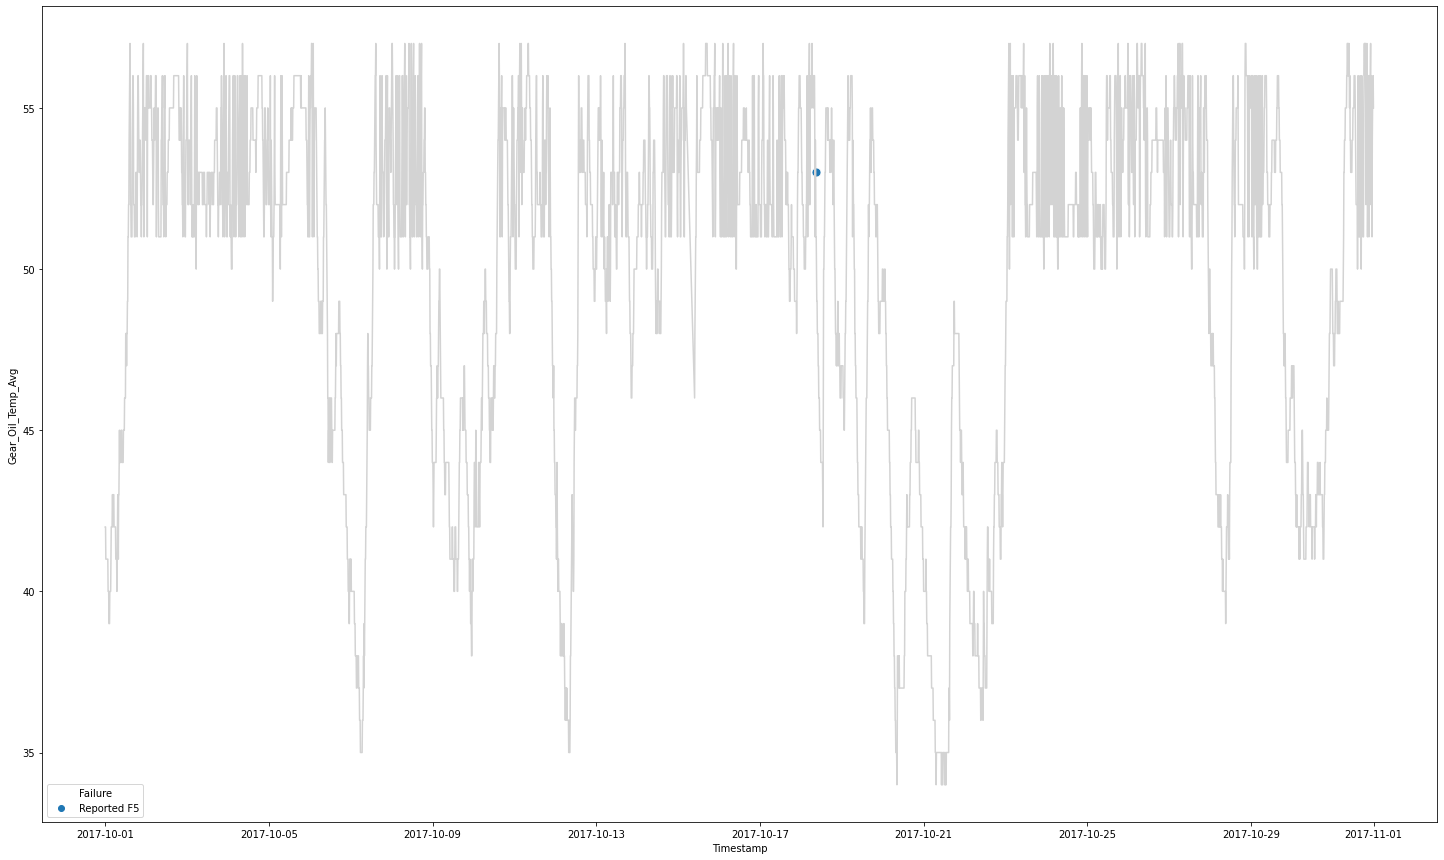

In [ ]:
#Visualize Failure 5
y = 'Gear_Oil_Temp_Avg'
data = wtg_data['2017-10-01' : '2017-10-31']
fig = plt.figure(figsize=(25,15))
sns.lineplot(x=x, y=y, data=data, color=c1)
sns.scatterplot(x=x, y=y, style=style, hue=hue, s=s, data=data[~(data.Failure == 'None')])